In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

`CUST_ID` : Identification of Credit Card holder (Categorical) <br>
`BALANCE` : Balance amount left in their account to make purchases <br>
`BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
`PURCHASES` : Amount of purchases made from account<br>
`ONEOFF_PURCHASES` : Maximum purchase amount done in one-go<br>
`INSTALLMENTS_PURCHASES` : Amount of purchase done in installment<br>
`CASH_ADVANCE` : Cash in advance given by the user<br>
`PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
`ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
`PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
`CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid<br>
`CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"<br>
`PURCHASES_TRX` : Numbe of purchase transactions made<br>
`CREDIT_LIMIT` : Limit of Credit Card for user<br>
`PAYMENTS` : Amount of Payment done by user<br>
`MINIMUM_PAYMENTS` : Minimum amount of payments made by user<br>
`PRCFULLPAYMENT` : Percent of full payment paid by user<br>
`TENURE` : Tenure of credit card service for user<br>


### [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.drop(columns=["CUST_ID"],inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Data exploration


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning

> ### fillin Missing Values in **`MINIMUM_PAYMENTS`** & **`CREDIT_LIMIT`** with mean for it's Feature

In [7]:
df["MINIMUM_PAYMENTS"].max()
df["MINIMUM_PAYMENTS"].min()
df["MINIMUM_PAYMENTS"].median()

np.float64(312.343947)

In [8]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())

In [9]:
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
df.isnull().sum()



BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## EDA

> ###  Explore relations between Features

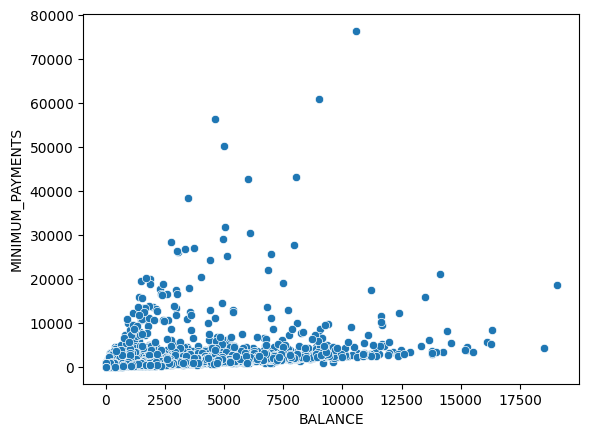

In [11]:
sns.scatterplot(data=df,x="BALANCE",y="MINIMUM_PAYMENTS")
plt.show()

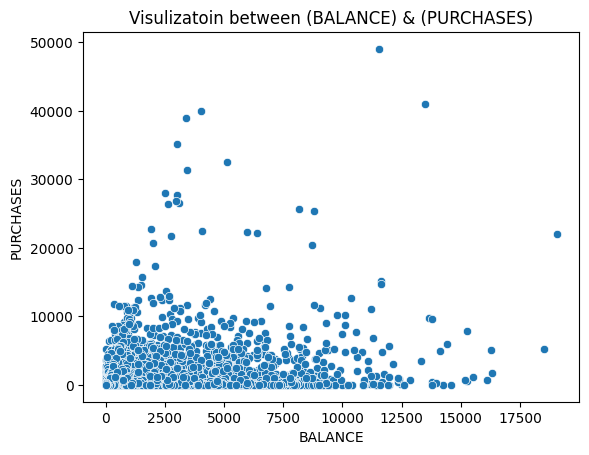

In [40]:
sns.scatterplot(data=df,x="BALANCE",y="PURCHASES")
plt.title("Visulizatoin between (BALANCE) & (PURCHASES)")
plt.show()

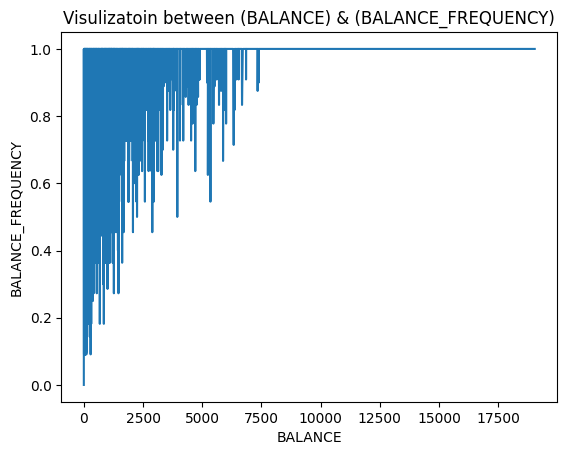

In [41]:
sns.lineplot(x=df["BALANCE"],y=df["BALANCE_FREQUENCY"])
plt.title("Visulizatoin between (BALANCE) & (BALANCE_FREQUENCY)")
plt.show()

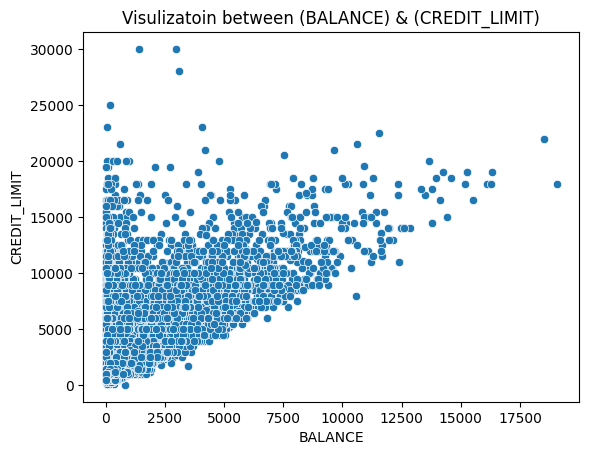

In [42]:
sns.scatterplot(x=df["BALANCE"],y=df["CREDIT_LIMIT"])
plt.title("Visulizatoin between (BALANCE) & (CREDIT_LIMIT)")
plt.show()

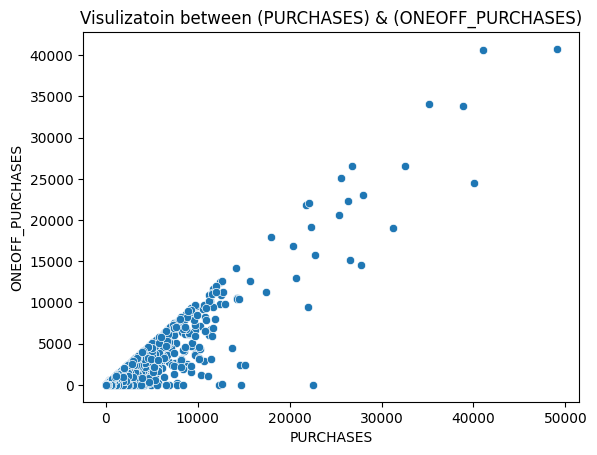

In [43]:
sns.scatterplot(x=df["PURCHASES"],y=df["ONEOFF_PURCHASES"])
plt.title("Visulizatoin between (PURCHASES) & (ONEOFF_PURCHASES)")

plt.show()

<Axes: >

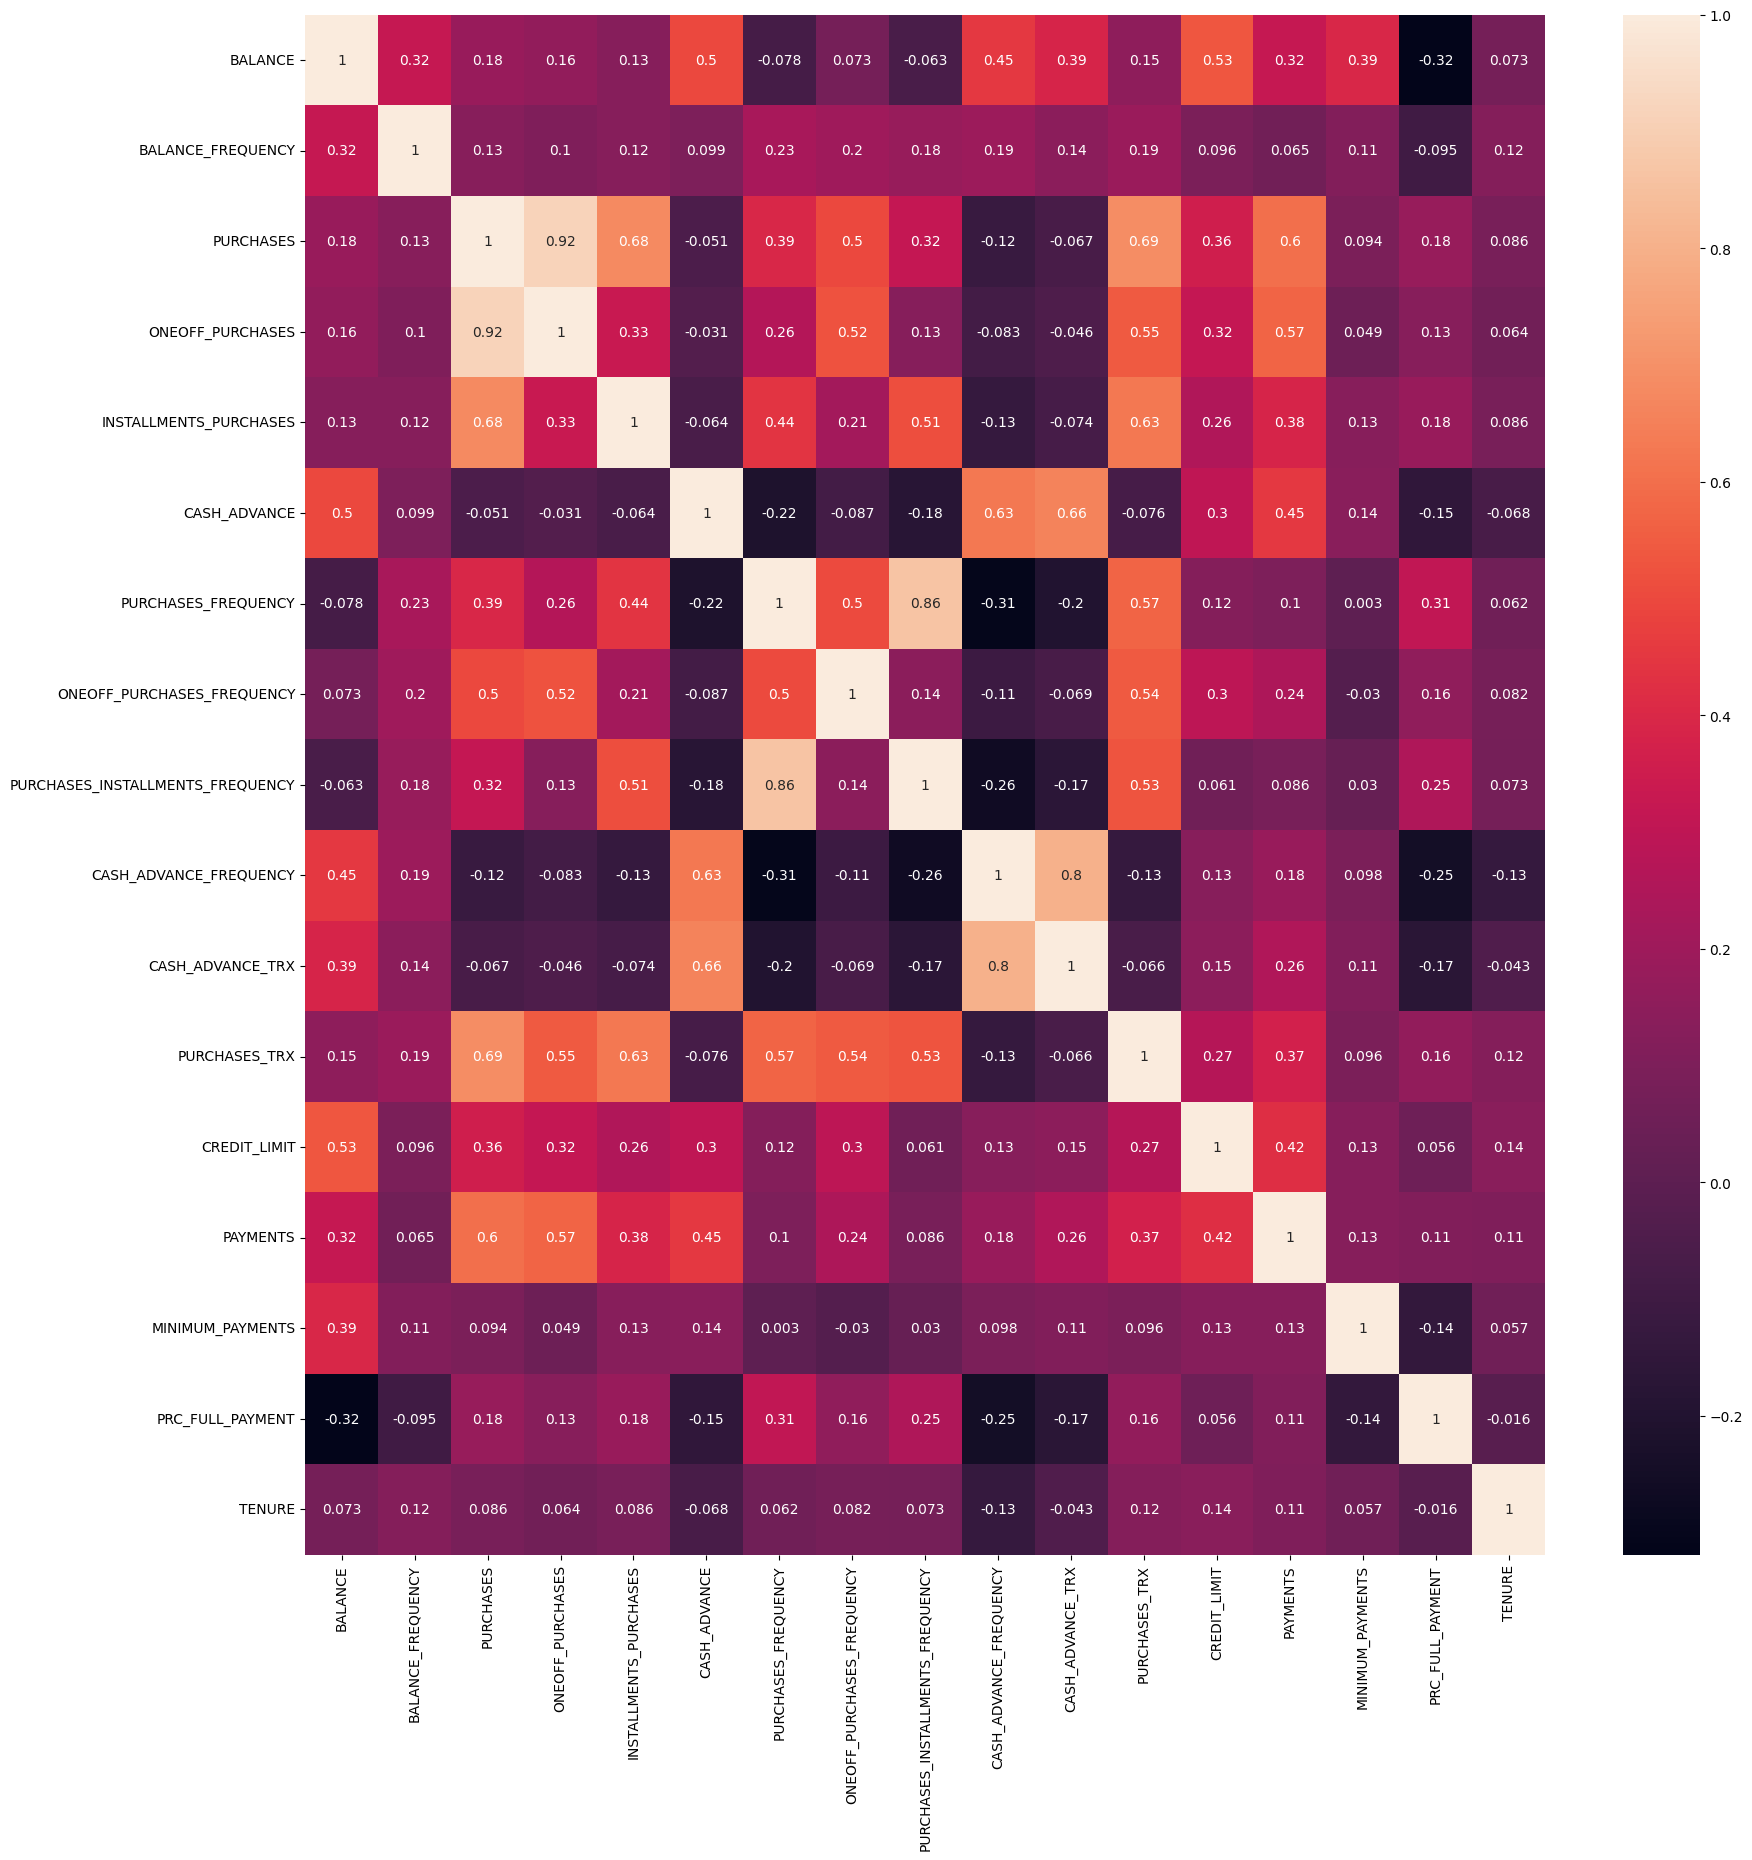

In [44]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True)

### There is a lot of `outliers` in this Data

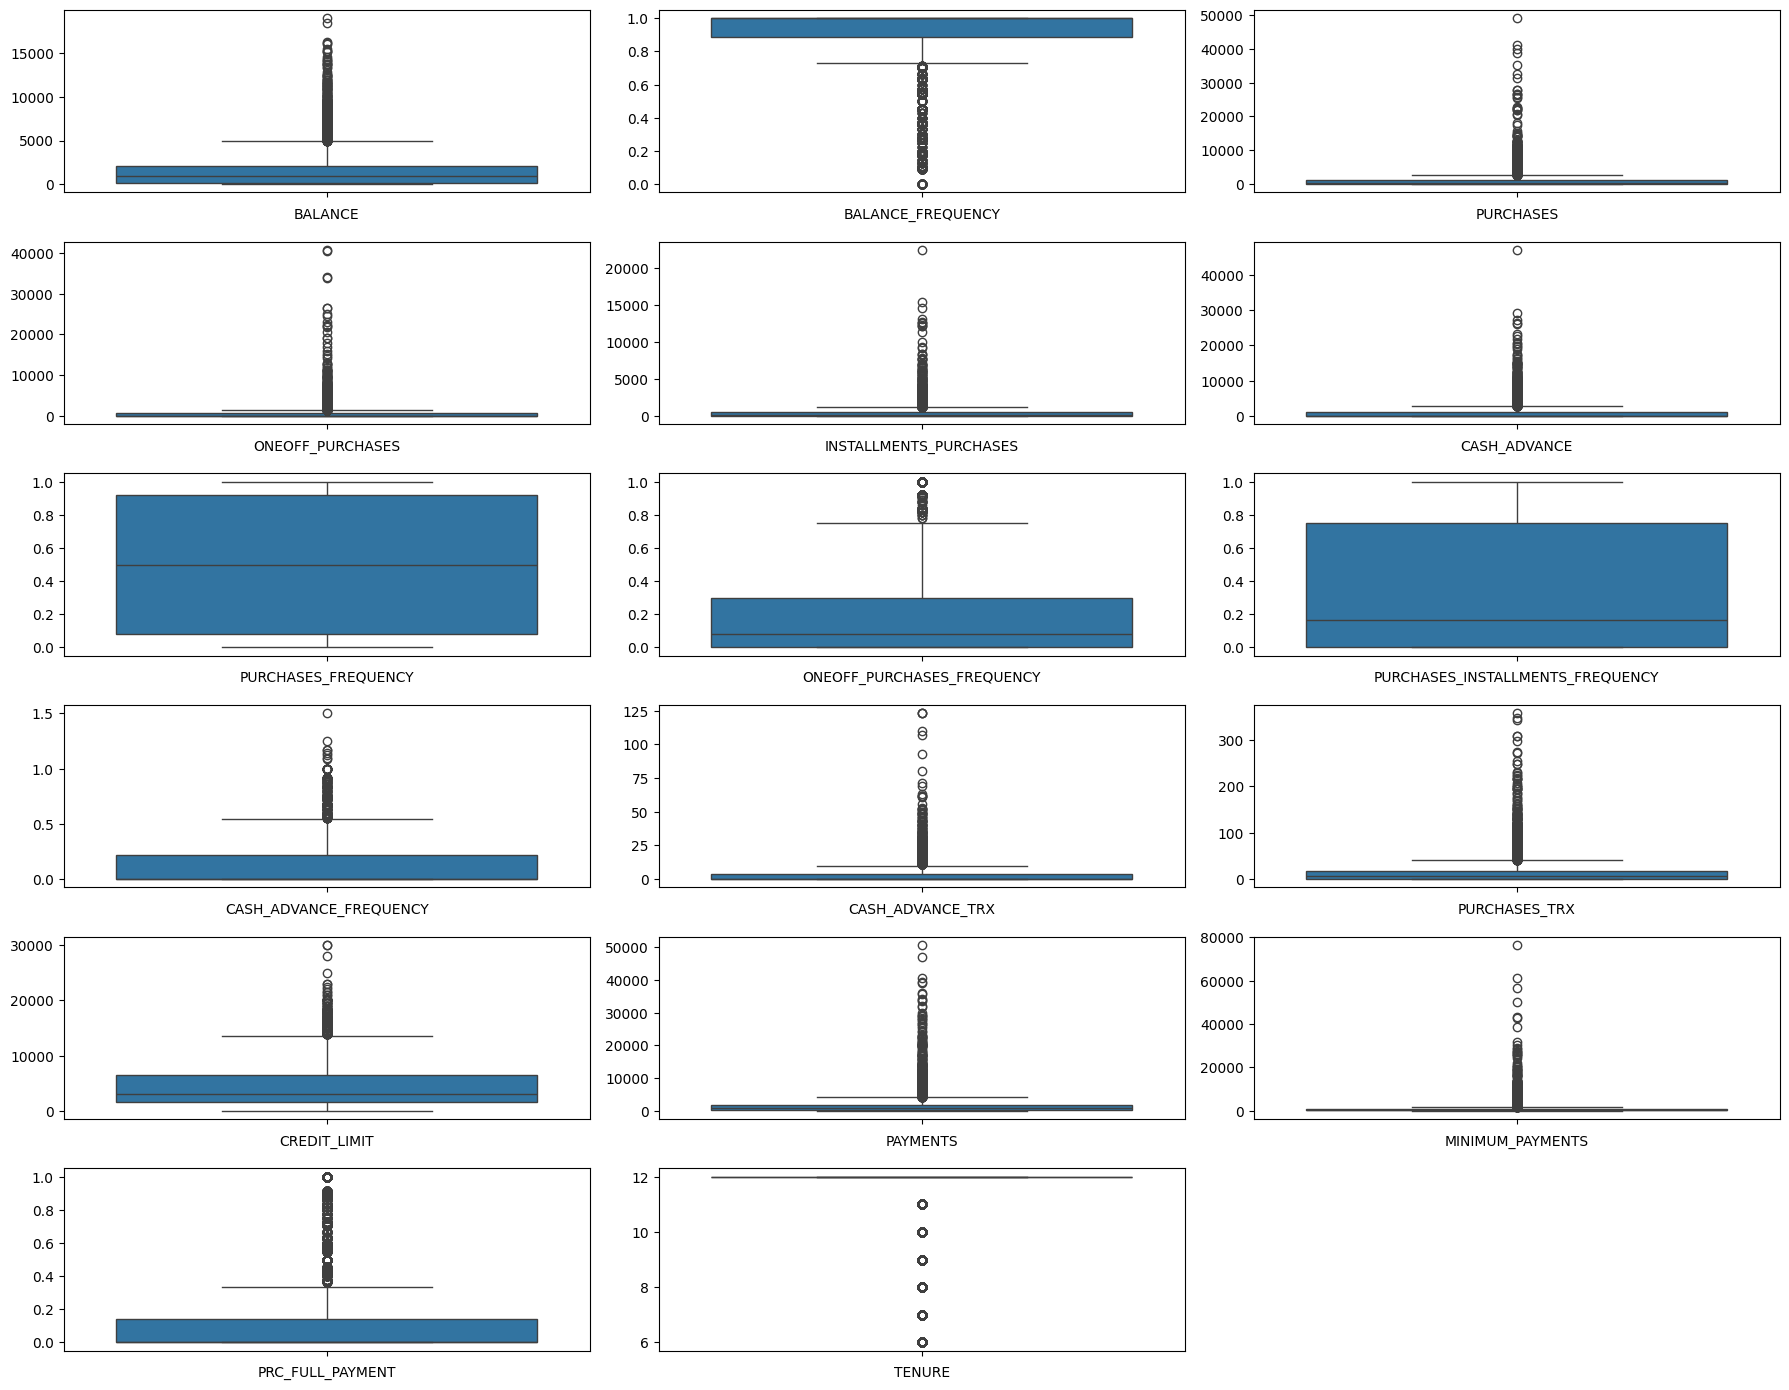

In [17]:
plt.figure(figsize=(18,14))
for index,column in enumerate(df.columns,start=1):
    plt.subplot(6,3,index)
    sns.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel("")

plt.tight_layout()
plt.show()

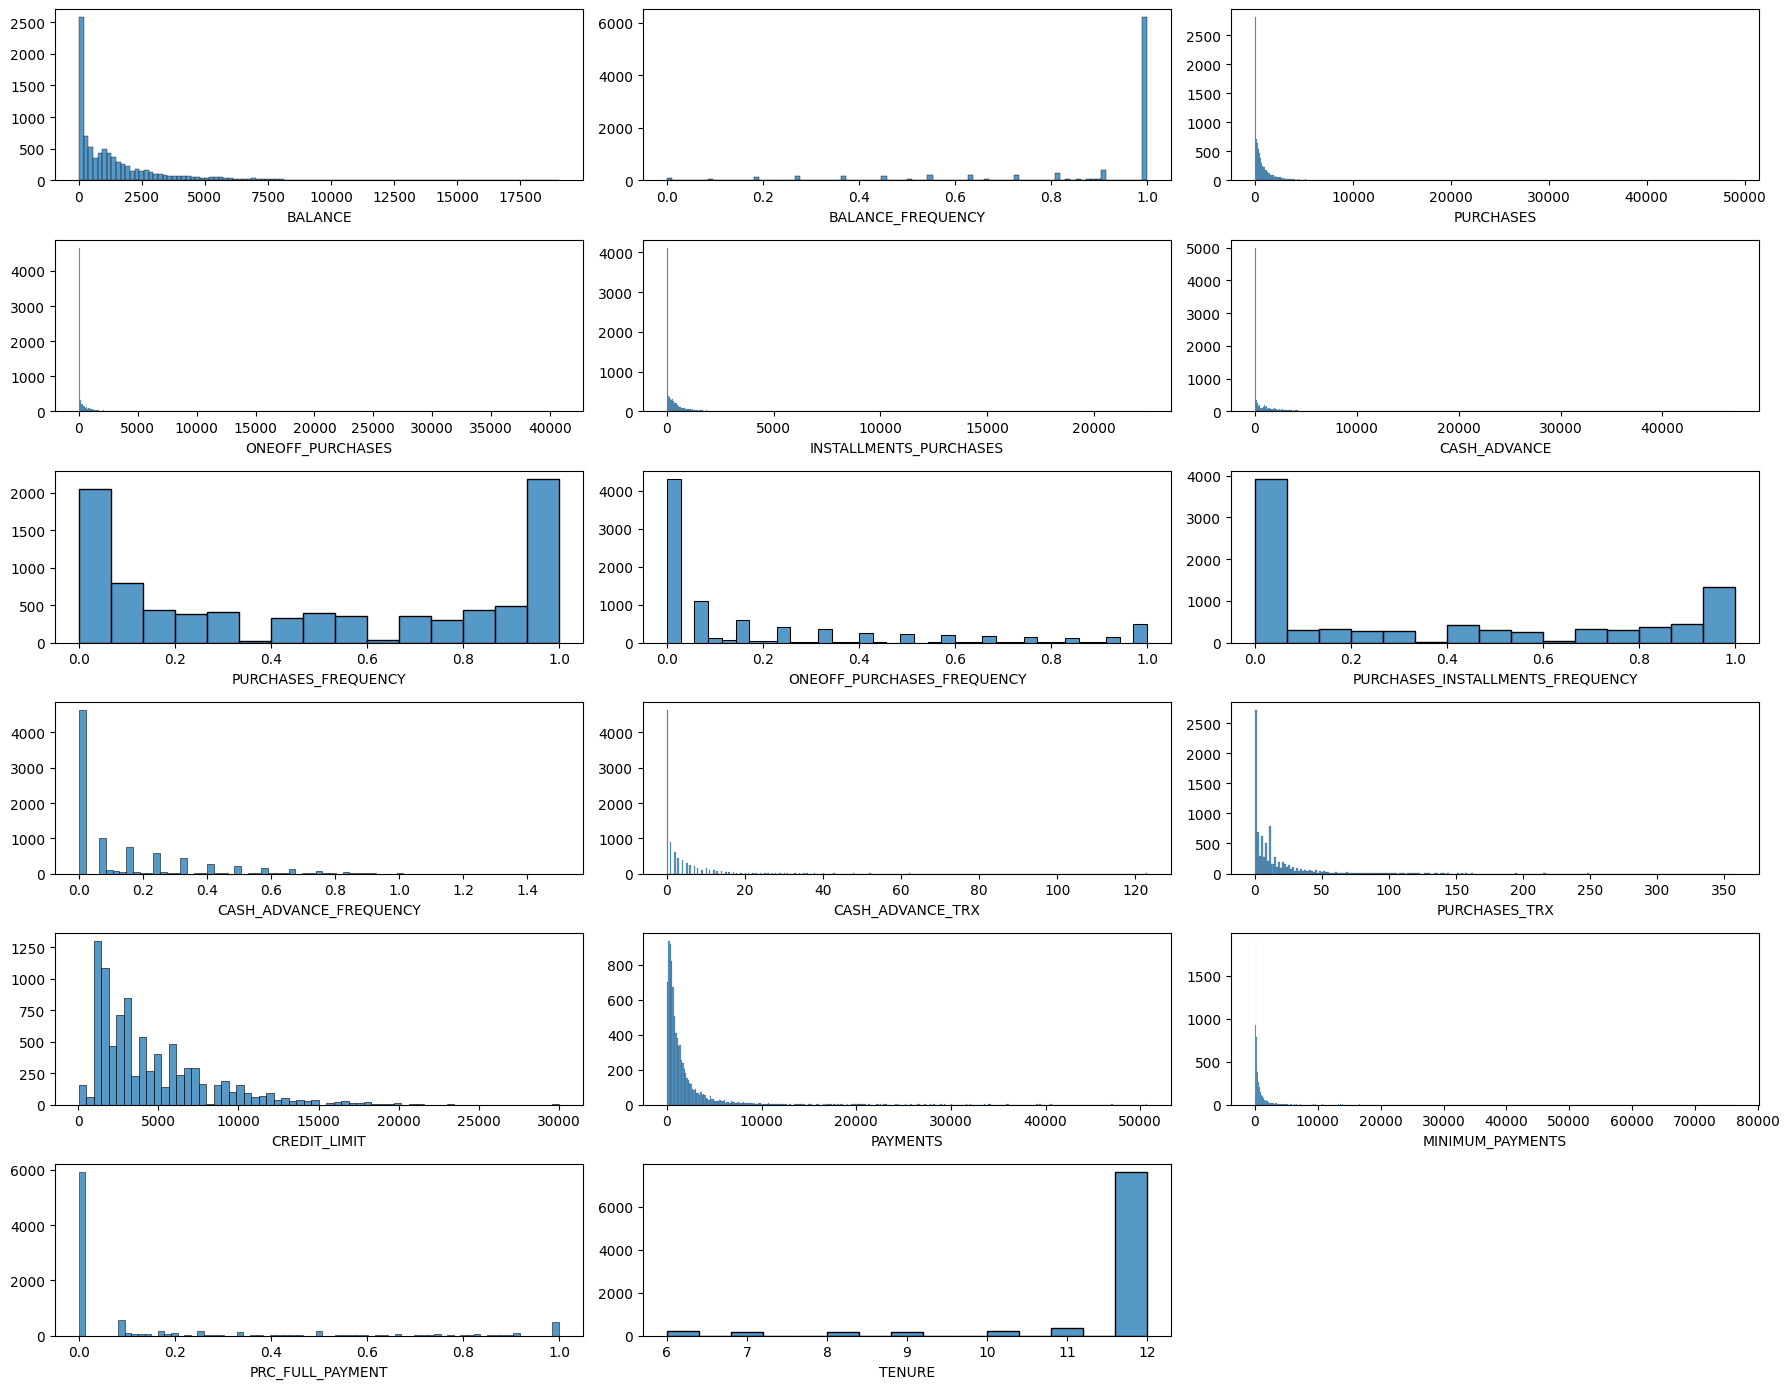

In [18]:
plt.figure(figsize=(18,14))
for index,column in enumerate(df.columns,start=1):
    plt.subplot(6,3,index)
    sns.histplot(df[column])
    plt.xlabel(column)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans

cost=[]
for i in range(1,30):
    kmean= KMeans(i)
    kmean.fit(x_scaled)
    cost.append(kmean.inertia_)  

## not the best `K` in this case 

Text(0.5, 1.0, 'Elbow Method for choosing (k)')

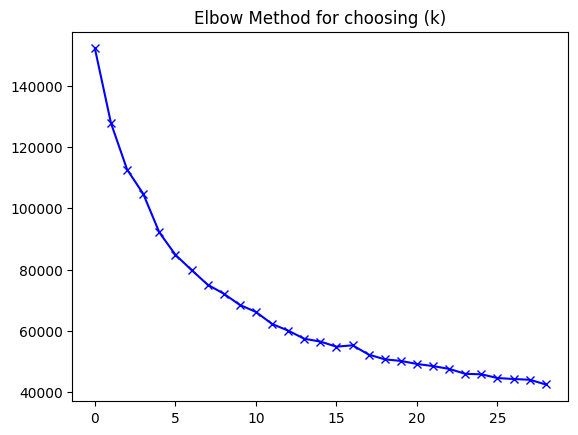

In [21]:
plt.plot(cost, 'bx-')
plt.title("Elbow Method for choosing (k)")

In [26]:
n_clusters = 6
kmean= KMeans(n_clusters=n_clusters,random_state=42)
kmean.fit(x_scaled)
labels=kmean.labels_
centroids = kmean.cluster_centers_

In [27]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

dist = cosine_similarity(x_scaled)
pca = PCA(n_components=2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

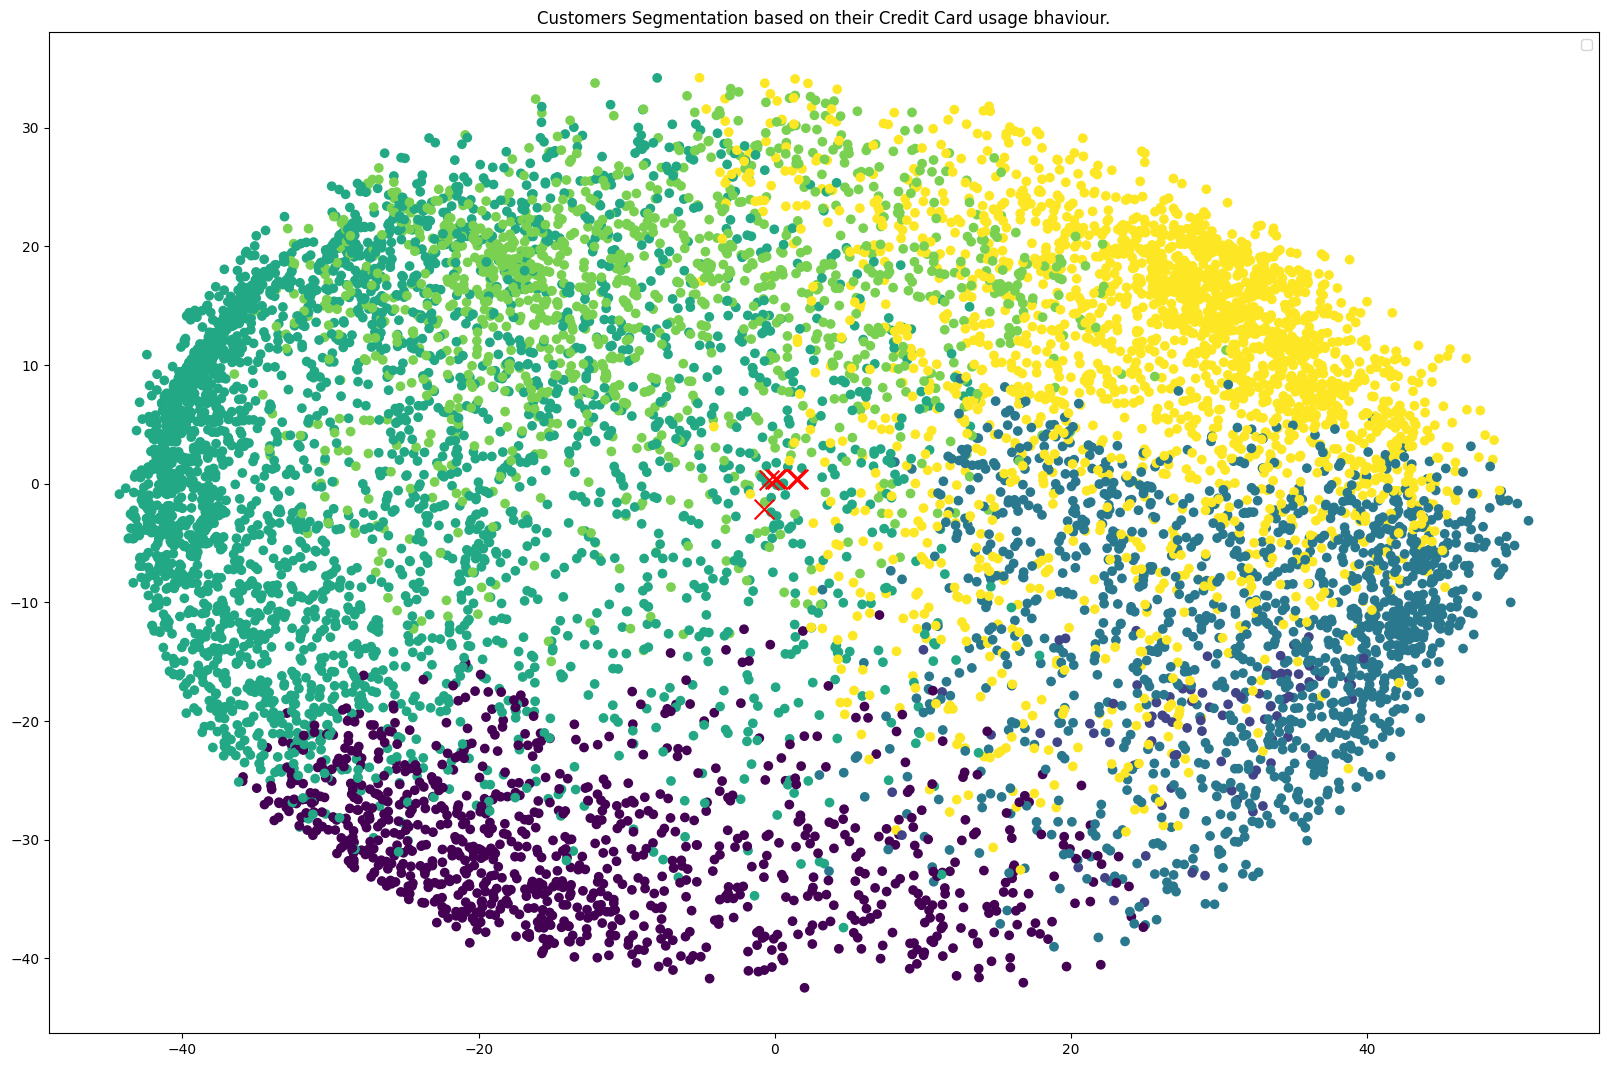

In [30]:
plt.figure(figsize=(20,13))
plt.scatter(x=X_PCA[:,0],y=X_PCA[:,1] , marker='o',c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",s=200, c='red')
plt.legend([])
plt.title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Not the Best performance in this case
> - **I think it's because of outliers**
> - **so we should handle these outliers to make sure of model performance**